# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [2]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig

# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")


# calcula la eigendescomposición
values, vectors = eig(A)

print("Eigenvalores")
print(values) #D

print("\n Eigenvectores")
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("\n -------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------

B= W @ D @ Winv

print(D)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
Eigenvalores
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]

 Eigenvectores
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]

 -------Matriz reconstruida-------
[[ 1.61168440e+01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.11684397e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.30367773e-15]]
-----------------------------


In [3]:
A = array([[3, 0, 2], [2, 0, 0], [0, 1, 1]])
values, vectors = eig(A)
print(values) #D
print(vectors) #W

[3.46750386+0.j         0.26624807+1.04051888j 0.26624807-1.04051888j]
[[-0.84900795+0.j          0.09644472+0.37691372j  0.09644472-0.37691372j]
 [-0.48969402+0.j          0.72447262+0.j          0.72447262-0.j        ]
 [-0.19845724+0.j         -0.32792089-0.46501803j -0.32792089+0.46501803j]]


In [4]:
#Matriz 1: Ejercicio para determinar la transformación W L W^-1

#Creo la matriz
A = array([[3, 0, 2],[3, 0, -1],[0, 1, 1]])

#Calculo las matrices W y  Lambda (Lamba es la matriz diagonal con los valores propios en la diagonal)

valores, vectores = np.linalg.eig(A)

#Esta matriz tiene valores propios imaginarios

W = vectores
D = np.diag(valores)
Winv = np.linalg.inv(W)

#Reconstrucción de la matriz

W @ D @ Winv

array([[ 3.00000000e+00+2.53856982e-17j, -1.90819582e-16+2.28402840e-17j,
         2.00000000e+00+1.62682204e-17j],
       [ 3.00000000e+00-2.22526164e-17j,  6.66133815e-16+9.88847940e-19j,
        -1.00000000e+00-2.33558777e-17j],
       [-1.11022302e-15+6.22654052e-17j,  1.00000000e+00-4.75468323e-17j,
         1.00000000e+00+5.29898295e-17j]])

In [5]:
#Matriz 2: Ejercicio para determinar la transformación W L W^-1

#Creo la matriz
A = array([[1, 3, 8],[3, 0, -1],[0, 0, 1]])

#Calculo las matrices W y  Lambda (Lamba es la matriz diagonal con los valores propios en la diagonal)

valores, vectores = np.linalg.eig(A)

#Esta matriz tiene valores propios imaginarios

W = vectores
D = np.diag(valores)
Winv = np.linalg.inv(W)

#Reconstrucción de la matriz

W @ D @ Winv

array([[ 1.00000000e+00,  3.00000000e+00,  8.00000000e+00],
       [ 3.00000000e+00,  6.28199153e-16, -1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [6]:
#Matriz 2: Ejercicio para determinar la transformación W L W^-1

#Creo la matriz
A = array([[5, 4, 0 ],[1, 0, 1],[10, 7, 1]])

#Calculo las matrices W y  Lambda (Lamba es la matriz diagonal con los valores propios en la diagonal)

valores, vectores = np.linalg.eig(A)

#Esta matriz tiene valores propios imaginarios

W = vectores
D = np.diag(valores)
Winv = np.linalg.inv(W)

#Reconstrucción de la matriz

W @ D @ Winv

array([[ 5.00000000e+00,  4.00000000e+00, -1.53912019e-15],
       [ 1.00000000e+00, -1.30389602e-15,  1.00000000e+00],
       [ 1.00000000e+01,  7.00000000e+00,  1.00000000e+00]])

**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


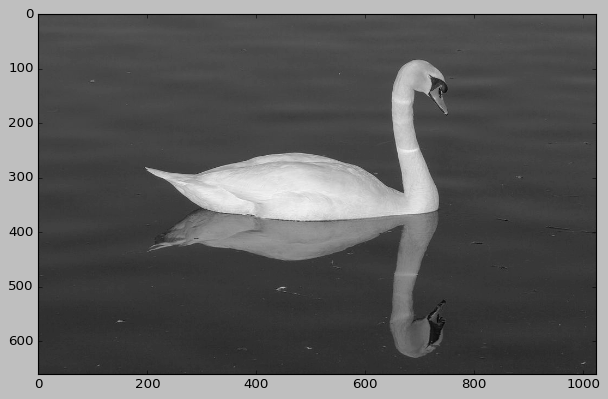

<PIL.Image.Image image mode=LA size=1024x660 at 0x7FBBF040E8D0>


In [7]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [8]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [9]:
U.shape

(660, 660)

In [10]:
V.shape

(1024, 1024)

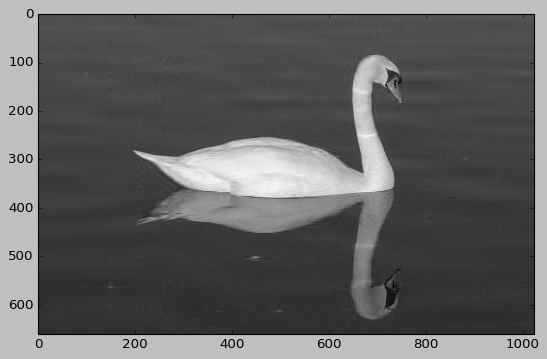

Felicidades la imagen está comprimida


In [11]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

[151. 151. 151. ...  67.  67.  70.]


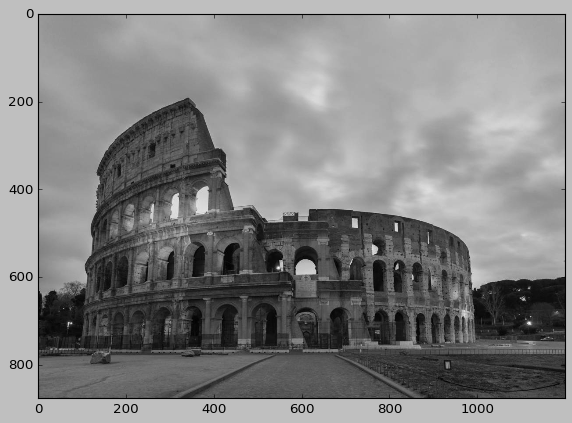

<PIL.Image.Image image mode=LA size=1200x875 at 0x7FBBEBF81E50>


In [12]:
#imagen 1. Coliseo Romano
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2022/06/coliseo-roma.jpg')).convert('LA')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [13]:
#Aquí aplico Singular Value Decomposition

U,D,V = np.linalg.svd(imgmat)
imgmat.shape


#U tiene tamaño 875 x 875; D deberia tener tamaño 857 x 1200; V tiene tamaño 1200 x 1200

(875, 1200)

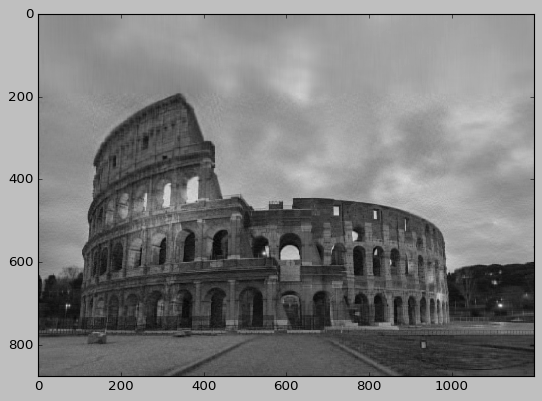

Al parecer con 80 columnas de la matriz V es suficiente para tener una imagen buena pero comprimida


In [14]:
#Ahora voy a experimentar qué pasa cuando tomo algún valor entre 0 y 857 dimensiones en el pixelado de la imagen

nvalue = 80
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Al parecer con 80 columnas de la matriz V es suficiente para tener una imagen buena pero comprimida")

[ 21.  22.  25. ... 153. 152. 153.]


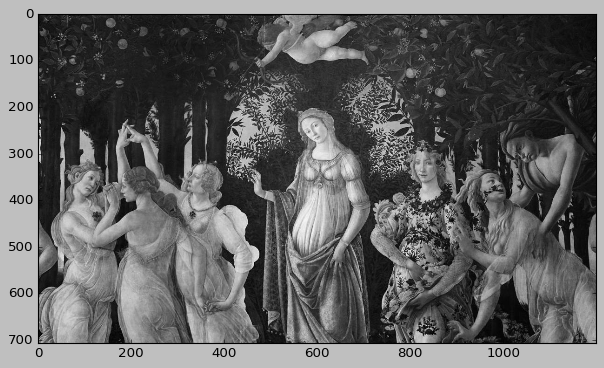

<PIL.Image.Image image mode=LA size=1200x706 at 0x7FBBEBFC7AD0>


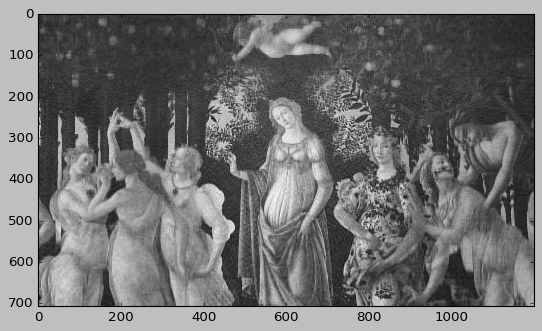

Al parecer con 90 columnas de la matriz V es suficiente para tener una imagen buena pero comprimida


In [15]:
#Imagen 2. Ahora más rápido. Cuadro Primavera

####Abro la imagen y la convierto en un arreglo que identifica el color de pixel.
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2022/03/primavera.jpg')).convert('LA')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)


#Aquí aplico Singular Value Decomposition

U,D,V = np.linalg.svd(imgmat)
imgmat.shape


#Aquí reconstruyo con menos dimensiones

nvalue = 90
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Al parecer con 90 columnas de la matriz V es suficiente para tener una imagen buena pero comprimida")



[ 53.  57.  60. ... 227. 226. 226.]


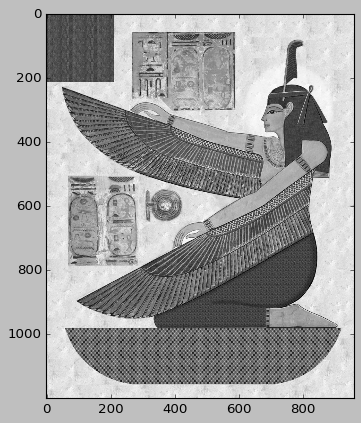

<PIL.Image.Image image mode=LA size=960x1200 at 0x7FBBEBFDC590>


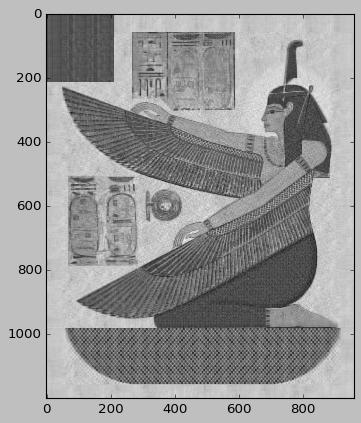

Al parecer con 90 columnas de la matriz V es suficiente para tener una imagen buena pero comprimida


In [16]:

#Imagen 3. Ahora más rápido. Cuadro Primavera

####Abro la imagen y la convierto en un arreglo que identifica el color de pixel.
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2022/04/Goddess_Maat.jpg')).convert('LA')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)


#Aquí aplico Singular Value Decomposition

U,D,V = np.linalg.svd(imgmat)
imgmat.shape


#Aquí reconstruyo con menos dimensiones

nvalue = 90
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Al parecer con 90 columnas de la matriz V es suficiente para tener una imagen buena pero comprimida")


# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




In [18]:
X = imgmat

In [33]:
#Con esta definición estoy creando el método PCA. Notar varias cosas:
#1. ingreso una matriz (un arreglo).
#2. La matriz de covarianza se calcula como (1/n).(X.T).(X) Ver que la operación entre X.T y X es el producto punto de las matrices.
#3. El procedimiento es luego calcular los valores y vectores propios de la matriz de covarianza.
#El procedimiento luego retorna la proyección de X sobre el espacio generado por los eigenvectores.

def pca(X):
  # Data matrix X, assumes 0-centered
  n, m = X.shape
  #assert np.allclose(X.mean(axis=0), np.zeros(m))
  # Compute covariance matrix
  C = np.dot(X.T, X) / (n-1)
  # Eigen decomposition
  eigen_vals, eigen_vecs = np.linalg.eig(C)
  # Project X onto PC space
  X_pca = np.dot(X, eigen_vecs)
  return X_pca

In [37]:
X_pca = pca(X)


array([[ 5.80144368e+03,  1.98107985e+03,  1.60199158e+02, ...,
         4.52242110e-02, -1.25439473e-02, -1.58031351e-01],
       [ 5.79819076e+03,  2.00957800e+03,  1.70557160e+02, ...,
        -1.33379018e-01,  1.87571160e-01,  2.45374630e-01],
       [ 5.79566516e+03,  2.03150429e+03,  1.71060683e+02, ...,
        -4.35853038e-02, -3.50596053e-01, -1.50617525e-01],
       ...,
       [ 6.84873088e+03,  4.74505802e+02,  4.21322191e+01, ...,
        -9.90295541e-02,  5.58433052e-02, -1.89006503e-02],
       [ 6.85450830e+03,  4.75259584e+02,  4.80735109e+01, ...,
         4.22090251e-01,  3.94189437e-02,  6.12129348e-03],
       [ 6.86988051e+03,  4.77666900e+02,  4.10086444e+01, ...,
        -9.07811926e-02, -2.34248009e-02, -5.32186518e-02]])

In [57]:
imgmat.std()

65.54479803542075

In [78]:
#En este procedimiento voy a calcular manualmente las matrices del svd

#*******************************************
#voy a calcular ahora las mismas matrices pero voy a garantizar la transformación estándar (media 0, desv est 1)
X = imgmat

scaler = StandardScaler()

#Aplico la transformación con el método fit.
scaler.fit(X)

#Luego transformo la matriz (arreglo) X ya con la transformación estándar.

X = scaler.transform(X)

#Verifico que tenga media 0 y desv estandar 1
print("Media de X ", round(np.mean(X), 2))
print("\nDesviación estándar de X", round(np.std(X), 2))

#*****************************************

#Ahora voy a aplicar el SVD
n, m = X.shape

# Calculo la matriz de covarianza de X.
C = np.dot(X.T, X) / (n-1)

# Eigen decomposition
eigen_vals, eigen_vecs = np.linalg.eig(C)

W = eigen_vecs
D = np.diag(eigen_vals)
Winv = np.linalg.inv(W)

#Esta es finalmente la proyección de X en el campo ortogonal generado por la matriz cuyas columnas son los valores propios
X_pca = np.dot(X, W)

Media de X  0.0

Desviación estándar de X 1.0


In [76]:
#Ahora voy a comprpbar que C = W.Lambda.W^-1

round(((W @ D @ Winv) - C).sum(),2)

#Con lo anterior pude comprobar que C, la matriz de covarianza, la puedo despomponer en tres matrices: la matriz W
#cuyas columnas son los vectores propios, lamba (matriz diagonal con los valores propios en la diagonal, cero en las demás partes),
#y la inversa de la matriz W. Tambié pude ver que realmente puedo obtener C con la multiplicación de estas tres variables.

0.0

In [81]:
#Finalmente puedo generar la rotación de X al hacer el producto punto de X con la matriz de los eigenvectores, W

X_pca = np.dot(X, W)

In [93]:
#En esta parte del código voy apenas a definir una función manual de SVD. Estoy utilizando la librería de álgebra lineal
#que ya calcula svd. Este método retorna la proyección de la matriz X, que ya está centrada, en  el campo generado por la matriz con los 
#vectores propios.

def svd(X):
  # Data matrix X, X doesn't need to be 0-centered
  n, m = X.shape
  # Compute full SVD
  U, Sigma, Vh = np.linalg.svd(X, 
      full_matrices=False, # It's not necessary to compute the full matrix of U or V
      compute_uv=True)
  # Transform X with SVD components
  
  X_svd = np.dot(U, np.diag(Sigma))
  return X_svd

In [96]:

X_svd = svd(X)

#Voy ahora a verificar que la proyección hecha con mi PCA y con SVA son la misma. :D
 
round((X_svd - X_pca).sum(), 1)

0.0

In [105]:
#Ahora voy a comprobar la relación entre PCA y SVD


# Compute covariance matrix
C = np.dot(X.T, X) / (n-1)
# Eigen decomposition
eigen_vals, eigen_vecs = np.linalg.eig(C)
# SVD
U, Sigma, Vh = np.linalg.svd(X, 
    full_matrices=False, 
    compute_uv=True)
# Relationship between singular values and eigen values:
#print(np.allclose(np.square(Sigma) / (n - 1), eigen_vals)) # True

y = np.square(Sigma) / (n - 1)

round((y - eigen_vals).sum(),0)

False


-0.0

Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 

1. Aprendí que SVD se realiza sobre la matriz de covarianzas luego de haber centralizado los datos de la matriz original con StandarScaler.
2. Aprendí que es posible calcular la matriz de covarianzas con la multiplicación de tres matrices que salen de los eigen valores y eigen vectores.
3. Aprendí que la proyección para la reducción de dimensionalidad se realiza con el producto punto entre la matriz original y la matriz cuyas columnas son los vectores propios.